# Domain knowledge
Data science is a powerful field but the raw data itself is just a starting point. To generate valuable insihgts, data scientists need a deep understanding of the specific domain they're working in. This domain knowledge acts as a bridge between the data and meaningful conclusions.

In [5]:
import pandas as pd
import numpy
import re
from sklearn import *
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("All_Data_Cleaned.csv")


C:\Users\PC\AppData\Local\Temp\ipykernel_5040\1013265087.py:1: DtypeWarning: Columns (36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("All_Data_Cleaned.csv")


# Domain Knowledge: Analyse the relationship between best squat (Best3SquatKg) and best deadlift (Best3DeadliftKg) while considering weight class 

This goes beyond a simple correlation analysis. You might explore the ratio between squat and deadlift within weight classes. For instance, calculate the average squat/deadlift ratio for each weight class and see if there are trends (e.g., heavier weight classes might have a lower ratio).

In [10]:
# Investigating the Weight Classes
df["WeightClassKg"].value_counts()

WeightClassKg
74-83kg (M)      132306
83-93kg (M)      117516
93-105kg (M)     109175
66-74kg (M)       88723
105-120kg (M)     85254
59-66kg (M)       52102
<59kg (M)         51790
63-69kg (F)       45608
76-84kg (F)       38383
69-76kg (F)       37607
57-63kg (F)       35043
52-57kg (F)       31067
84kg+ (F)         28056
<52kg (F)         15676
Name: count, dtype: int64

<Axes: >

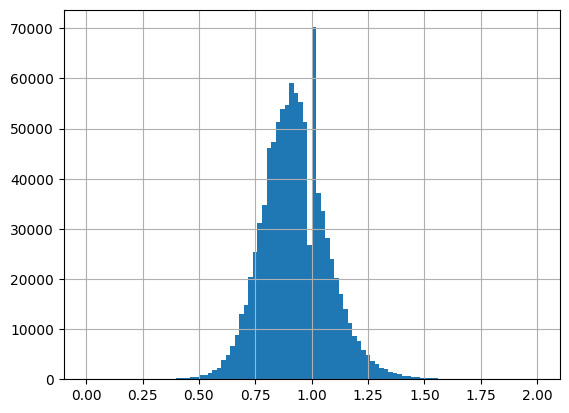

In [11]:
# Creating the squat to deadlift ratio 
squat_deadlift_df = df.copy()

squat_deadlift_df["Squat Deadlift Ratio"] = squat_deadlift_df["Best3SquatKg"] / squat_deadlift_df["Best3DeadliftKg"]
squat_deadlift_df["Squat Deadlift Ratio"].hist(bins=100,range=(0,2))

Squat to deadlift ratio seems to follow a relatively normal distribution 

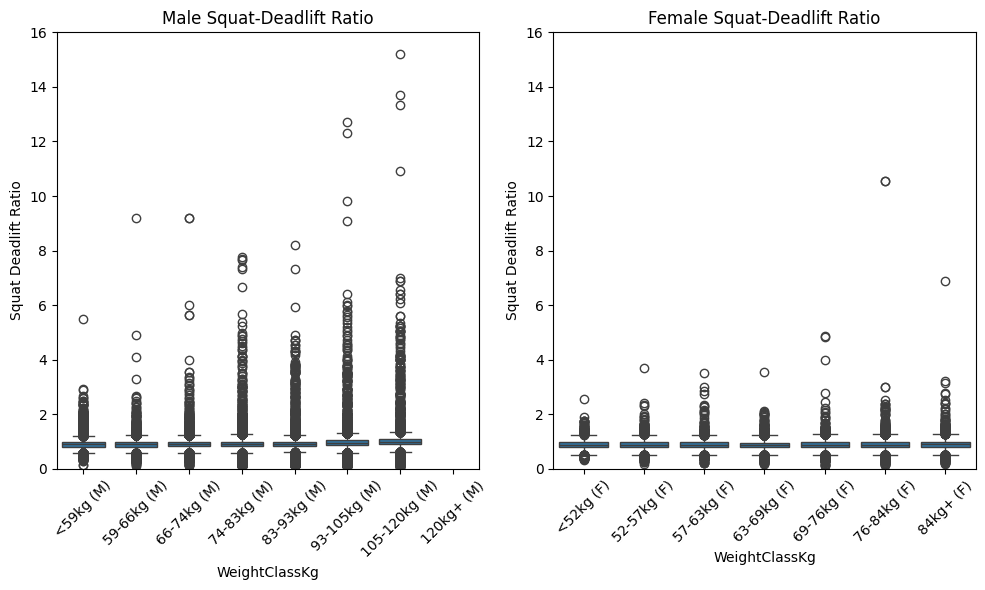

In [14]:
# Group the data by weight class

m_squat_deadlift_df = squat_deadlift_df[squat_deadlift_df["Sex"] == "M"]
f_squat_deadlift_df = squat_deadlift_df[squat_deadlift_df["Sex"] == "F"]


m_weight_classes = ["<59kg (M)","59-66kg (M)","66-74kg (M)","74-83kg (M)","83-93kg (M)","93-105kg (M)","105-120kg (M)","120kg+ (M)"]
f_weight_classes = ["<52kg (F)","52-57kg (F)","57-63kg (F)","63-69kg (F)","69-76kg (F)","76-84kg (F)","84kg+ (F)"]

# Plot the distributions for each group
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

sns.boxplot(data = m_squat_deadlift_df,
            x=m_squat_deadlift_df["WeightClassKg"],
            y=m_squat_deadlift_df["Squat Deadlift Ratio"],
            order= m_weight_classes,
            ax = ax1)
ax1.set_title("Male Squat-Deadlift Ratio")
ax1.set_ylim(0, 16)
ax1.tick_params(axis='x', which='both', rotation=45)
sns.boxplot(data = f_squat_deadlift_df,
            x=f_squat_deadlift_df["WeightClassKg"],
            y=f_squat_deadlift_df["Squat Deadlift Ratio"],
            order= f_weight_classes,
            ax = ax2)
ax2.set_title("Female Squat-Deadlift Ratio")
ax2.set_ylim(0, 16)
ax2.tick_params(axis='x', which='both', rotation=45) 

plt.tight_layout()
plt.show()




In [15]:
# Printing the average squat to deadlift ratio for each class
m_dict ={}

for i in m_weight_classes:
    temp_df = squat_deadlift_df[squat_deadlift_df["WeightClassKg"] == i]
    m_dict[i] = temp_df["Squat Deadlift Ratio"].mean()


print("Mens")
for cl, ratio in m_dict.items():
    print(cl, ": ", ratio)


f_dict ={}

for i in f_weight_classes:
    temp_df = squat_deadlift_df[squat_deadlift_df["WeightClassKg"] == i]
    f_dict[i] = temp_df["Squat Deadlift Ratio"].mean()

print("\nFemales")
for cl, ratio in f_dict.items():
    print(cl, ": ", ratio)

Mens
<59kg (M) :  0.8968855068954192
59-66kg (M) :  0.8964489395147694
66-74kg (M) :  0.9010145240439974
74-83kg (M) :  0.9148730004603544
83-93kg (M) :  0.9288116907966718
93-105kg (M) :  0.9558320746483998
105-120kg (M) :  0.9938993515840263
120kg+ (M) :  nan

Females
<52kg (F) :  0.8838973985337663
52-57kg (F) :  0.8829049560153664
57-63kg (F) :  0.876766369631502
63-69kg (F) :  0.8746870046007938
69-76kg (F) :  0.8872144922747845
76-84kg (F) :  0.8947203122411128
84kg+ (F) :  0.9101462219754677


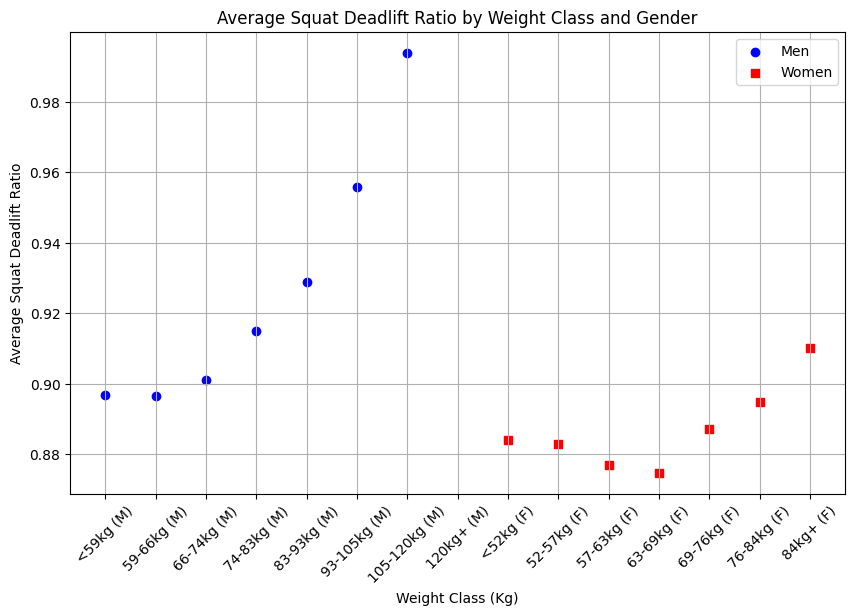

In [17]:
# Separate data for men and women
men_weight_classes = list(m_dict.keys())  # Extract weight classes from men's dictionary
men_ratios = list(m_dict.values())  # Extract average ratios for men

women_weight_classes = list(f_dict.keys())  # Extract weight classes from women's dictionary
women_ratios = list(f_dict.values())  # Extract average ratios for women

# Create the scatter plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Plot men's data (blue circles)
plt.scatter(men_weight_classes, men_ratios, color='blue', label='Men', marker='o')

# Plot women's data (red squares)
plt.scatter(women_weight_classes, women_ratios, color='red', label='Women', marker='s')

# Set labels and title
plt.xlabel("Weight Class (Kg)")
plt.ylabel("Average Squat Deadlift Ratio")
plt.title("Average Squat Deadlift Ratio by Weight Class and Gender")

# Add legend
plt.legend()

# Rotate x-axis labels for better readability if many classes
plt.xticks(rotation=45)

# Add grid for clarity
plt.grid(True)

plt.show()

The average squat to bench ratio increases with an increase in weight class. Lighter atheletes tend to have similar ratios in both mens and womens weight classes